# Problems encountered

##### Regarding Ishida's suggestion: termperature is not used since the information is not onctain in PDB file.

##### Where does the side chain of each residue starts in the pdb file: Starts with Carbon Beta.  There is the exception
What about glycine/proline/hydorxyl proline

In [1]:
%matplotlib inline

In [2]:
from Bio.PDB import *
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from mendeleev import element as ele
import matplotlib.pylab as plt

In [3]:
AMINO_ACIDS = np.array(['ALA', 'CYS', 'ASP', 'GLU', 'PHE', 'GLY', 'HIS', 'ILE', 'LYS', 'LEU', 'MET', 'ASN', 'PRO', 'GLN', 'ARG'
               , 'SER','THR', 'VAL', 'TRP', 'TYR'])

### Get structure of protein

In [7]:
parser = PDBParser()
structure = parser.get_structure("2XZN", "../datasets/Tongji/benchmark/pdb/2XZN.pdb")

/home/chrisbinig/.local/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 5 is discontinuous at line 82468.
  PDBConstructionWarning,
/home/chrisbinig/.local/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 6 is discontinuous at line 82469.
  PDBConstructionWarning,
/home/chrisbinig/.local/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 9 is discontinuous at line 82470.
  PDBConstructionWarning,
/home/chrisbinig/.local/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain N is discontinuous at line 82471.
  PDBConstructionWarning,
/home/chrisbinig/.local/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain 2 is discontinuous at line 82472.
  PDBConstructionWarning,
/home/chrisbinig/.local/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: P

In [8]:
for chain in structure[0]:
    for res in chain:
        print("{} len:{}".format(res.get_resname(), len(res.get_resname())))

ASN len:3
THR len:3
GLU len:3
GLU len:3
THR len:3
THR len:3
LYS len:3
ALA len:3
ARG len:3
ILE len:3
MET len:3
ASP len:3
VAL len:3
LEU len:3
GLY len:3
LYS len:3
THR len:3
GLY len:3
SER len:3
ARG len:3
GLY len:3
GLY len:3
ILE len:3
THR len:3
GLN len:3
VAL len:3
ARG len:3
VAL len:3
VAL len:3
LEU len:3
ILE len:3
SER len:3
GLY len:3
LYS len:3
GLU len:3
GLU len:3
GLY len:3
ARG len:3
GLN len:3
LEU len:3
ILE len:3
ARG len:3
ASN len:3
VAL len:3
LYS len:3
GLY len:3
ALA len:3
CYS len:3
ARG len:3
VAL len:3
GLY len:3
ASP len:3
VAL len:3
LEU len:3
GLU len:3
LEU len:3
MET len:3
GLU len:3
CYS len:3
GLU len:3
ARG len:3
GLU len:3
ALA len:3
ARG len:3
ARG len:3
LEU len:3
ARG len:3
GLY len:3
ILE len:3
SER len:3
ARG len:3
ASP len:3
SER len:3
LYS len:3
HIS len:3
LYS len:3
ARG len:3
ARG len:3
ALA len:3
THR len:3
GLY len:3
GLY len:3
ARG len:3
MET len:3
PRO len:3
VAL len:3
HIS len:3
ARG len:3
LYS len:3
LYS len:3
ARG len:3
ALA len:3
PHE len:3
GLU len:3
LYS len:3
GLY len:3
ARG len:3
PRO len:3
ILE len:3
SER len:3


VAL len:3
VAL len:3
VAL len:3
GLY len:3
ASP len:3
SER len:3
ASN len:3
GLY len:3
HIS len:3
ILE len:3
GLY len:3
LEU len:3
GLY len:3
TRP len:3
LYS len:3
VAL len:3
ALA len:3
LYS len:3
GLU len:3
VAL len:3
GLN len:3
GLY len:3
ALA len:3
ILE len:3
LYS len:3
GLY len:3
ALA len:3
ILE len:3
THR len:3
HIS len:3
ALA len:3
LYS len:3
LEU len:3
ASN len:3
MET len:3
VAL len:3
PRO len:3
VAL len:3
ARG len:3
LYS len:3
GLY len:3
TYR len:3
TRP len:3
GLY len:3
ASN len:3
LYS len:3
ILE len:3
ALA len:3
ASN len:3
ALA len:3
HIS len:3
THR len:3
ILE len:3
PRO len:3
GLN len:3
LYS len:3
ILE len:3
THR len:3
GLY len:3
LYS len:3
SER len:3
GLY len:3
SER len:3
VAL len:3
ARG len:3
ILE len:3
ARG len:3
LEU len:3
VAL len:3
PRO len:3
ALA len:3
PRO len:3
ARG len:3
GLY len:3
THR len:3
GLY len:3
ILE len:3
VAL len:3
ALA len:3
ALA len:3
PRO len:3
ILE len:3
PRO len:3
LYS len:3
LYS len:3
VAL len:3
LEU len:3
GLN len:3
PHE len:3
ALA len:3
GLY len:3
VAL len:3
GLN len:3
ASP len:3
ILE len:3
TYR len:3
THR len:3
SER len:3
SER len:3
GLN len:3


In [7]:
model_0 = structure[0]
res_coord = []
for chain in model_0:
    print(len(chain.get_id()))
    for residue in chain:
        print(residue.get_id())
        for atom in residue:
            if atom.get_id() == 'CA':
                res_coord.append(atom.get_coord())
            print(atom.get_coord())

1
(' ', 4, ' ')
[9.536 6.811 7.676]
[10.617  6.054  7.145]
[11.19   6.7    5.875]
[12.365  5.959  5.435]
[10.264  6.644  4.657]
[9.3   7.705 4.62 ]
[11.235  6.678  3.482]
[11.451  7.949  2.868]
[12.534  6.1    4.016]
[12.901  4.816  3.367]
[12.912  3.591  3.921]
[13.279  2.621  3.121]
[13.534  3.248  1.93 ]
[13.958  2.683  0.72 ]
[14.185  1.483  0.537]
[14.106  3.675 -0.294]
[13.87   5.055 -0.145]
[14.093  5.754 -1.293]
[13.46   5.557  1.052]
[13.311  4.622  2.034]
[10.263  5.022  6.937]
[11.408  6.001  7.924]
[11.546  7.732  6.079]
[9.785 5.642 4.63 ]
[10.853  5.939  2.744]
[11.048  7.896  1.998]
[13.364  6.807  3.804]
[12.59   3.573  4.962]
[14.398  3.333 -1.198]
[14.383  5.252 -2.108]
[13.969  6.745 -1.319]
[9.887 7.687 7.85 ]
(' ', 5, ' ')
[7.892 7.568 3.883]
[7.112 8.799 4.143]
[7.256 6.293 4.289]
[8.256 7.481 2.328]
[8.498 8.643 1.536]
[8.807 8.359 0.034]
[10.13   7.756 -0.193]
[ 7.824  7.449 -0.712]
[ 6.628  8.139 -1.095]
[ 8.674  6.932 -1.889]
[ 8.76   7.845 -2.985]
[10.053  6.

### Making features

#### One-hot encoded residue

In [6]:
aa_residue = structure[0]['A']
aa_list = np.array([])
for residue in aa_residue:
    aa_list = np.append(aa_list, residue.get_resname())
print(aa_list)

['ALA' 'SER' 'ASN' 'VAL' 'THR' 'ASN' 'LYS' 'THR' 'ASP' 'PRO' 'ARG' 'SER'
 'MET' 'ASN' 'SER' 'ARG' 'VAL' 'PHE' 'ILE' 'GLY' 'ASN' 'LEU' 'ASN' 'THR'
 'LEU' 'VAL' 'VAL' 'LYS' 'LYS' 'SER' 'ASP' 'VAL' 'GLU' 'ALA' 'ILE' 'PHE'
 'SER' 'LYS' 'TYR' 'GLY' 'LYS' 'ILE' 'VAL' 'GLY' 'CYS' 'SER' 'VAL' 'HIS'
 'LYS' 'GLY' 'PHE' 'ALA' 'PHE' 'VAL' 'GLN' 'TYR' 'VAL' 'ASN' 'GLU' 'ARG'
 'ASN' 'ALA' 'ARG' 'ALA' 'ALA' 'VAL' 'ALA' 'GLY' 'GLU' 'ASP' 'GLY' 'ARG'
 'MET' 'ILE' 'ALA' 'GLY' 'GLN' 'VAL' 'LEU' 'ASP' 'ILE' 'ASN' 'LEU' 'ALA'
 'ALA' 'GLU' 'PRO' 'LYS' 'VAL' 'ASN' 'ARG' 'GLY' 'LYS' 'ALA' 'GLY' 'VAL'
 'LYS' 'ARG' 'SER' 'ALA' 'ALA' 'GLU' 'MET' 'TYR' 'GLY']


In [7]:
AA = AMINO_ACIDS.reshape(-1, 1)

In [8]:
encoder = OneHotEncoder(sparse = False)
encoder.fit(AA)
#obtain one hot encode version of the residues
aa_list_oh = encoder.transform(aa_list.reshape(-1, 1))

In [9]:
#Display first 10 one-hot example
for i, aa in enumerate(aa_list_oh):
    if i >= 10: break
    print(aa)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#### Hydrophobicity/hydropholicity
Calculated based on side chain and main chain cosine similarity, in range of [-1.0, 1.0]

In [28]:
def hydropathy(structure):
    ### need to change
    p_chain = structure[0]['A']
    side_chains_com = []
    hydropathy = []
    
    for residue in p_chain:
        if residue.get_id() == 'GLY':
            continue
        
        atom_list = residue.get_unpacked_list()
        
        side_chain = []
        carbon_beta_index = 0
        
        for i, a in enumerate(atom_list):
            if a.get_id() == 'CB':
                carbon_beta_index = i
                break
        
        side_chain = atom_list[carbon_beta_index:]
        
        #calculate the center of mass for side chain
        coord = [0, 0, 0]
        total_mass = 0
        for atom in side_chain:
            coord += atom.get_coord() * ele(atom.get_id()[0]).mass
            total_mass += ele(atom.get_id()[0]).mass
        
        sc_com = coord / total_mass
        side_chains_com.append(sc_com)
    
    protein_com = comWMass(structure)
    
    for com in side_chains_com:
        dot = np.dot(com, protein_com)
        norm_com = np.linalg.norm(com)
        norm_protein = np.linalg.norm(protein_com)
        cos = dot/ (norm_com * norm_protein)
        hydropathy.append(cos)
    
    return hydropathy

In [29]:
res_hyd = hydropathy(structure)

Coordinates of center of mass is  [-9.78907016  1.87884292  1.8326195 ]


In [30]:
print(res_hyd)

[0.1450883364618011, 0.10093548176542771, -0.11193293958362012, 0.2416527642843917, 0.5582508790071807, 0.4142591915216051, 0.4662136864163909, 0.6359717297066809, 0.6182680713821618, 0.7533181013530503, 0.6751613074404699, 0.682492003064017, 0.8102433983141604, 0.8828949774674973, 0.7770225369464747, 0.7746479199421636, 0.9461037940250413, 0.9145715406462224, 0.9842388809293187, 0.8245666796249794, 0.5703956699500294, 0.6360724523346936, 0.13979320548038107, 0.030246439771660104, -0.31270873176610575, -0.445129175019002, -0.16587378269986788, -0.8270016890021258, -0.25402963909799314, -0.6033141515622669, -0.42782048328429056, 0.622116550201788, -0.05106753859037694, -0.01241437429259863, 0.3514709543948916, 0.7926044771728322, 0.32076223585323277, 0.49532259482016616, 0.699393576768374, 0.5834613627453689, 0.35989377564788494, 0.48170141593668364, 0.43364295900445005, 0.4128998379289454, 0.3627628676797129, 0.377103776934087, -0.023885674526562286, 0.3091353169372931, -0.250987736916

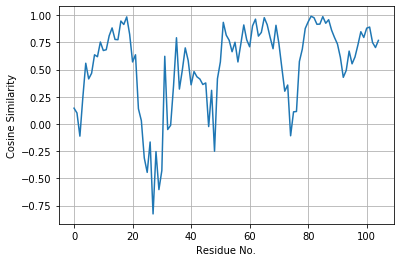

In [37]:
fig, ax = plt.subplots()
ax.plot(res_hyd)
ax.set(xlabel = "Residue No.", ylabel = "Cosine Similarity")
ax.grid()
plt.show()

#### Index of Residue (index is in format of tuple with [' ', id, ' '])

In [14]:
aa_indexes = np.array([])
for r in aa_residue:
    aa_indexes = np.append(aa_indexes, r.get_id()[1])
print(aa_indexes)

[  2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.
  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.
  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.
  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.
  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99.
 100. 101. 102. 103. 104. 105. 106.]


#### Distance between $C_\alpha$ and center of mass

##### $C_\alpha$ coordinate of amino acid VAL in polypeptide chain

In [15]:
residue_5 = structure[0]['A'][5]
print(residue_5)
CA_5 = structure[0]['A'][5]['CA']
print(CA_5.get_coord())

<Residue VAL het=  resseq=5 icode= >
[-0.694 12.39   3.043]


In [31]:
"""
Calculating protein COM base only coordinates
"""
def comWOMass(structure):
    # This line need to be changed for the future coding
    protein_chain = structure[0]['A']
    
    com = np.array([0, 0, 0])
    atom_count = 0
    for residue in protein_chain:
        for atom in residue:
            atom_count += 1
            coord = atom.get_coord()
            com = com + coord
    
    result = com/atom_count
    print("Coordinates of center of mass (without mass) is ", +result)
    return result

In [32]:
comWOMass(structure)

Coordinates of center of mass (without mass) is  [-9.52857786  1.88670982  1.77644652]


array([-9.52857786,  1.88670982,  1.77644652])

##### Equation
$
x = \sum_i(m_i x_i)/\sum_i(m_i)
$

In [33]:
"""
Calculating protein COM base on coordinates and mass (equation from CALCOM)
"""
def comWMass(structure):
    
    com = np.array([0., 0., 0.])
    total_mass = 0
    
    protein_chain = structure[0]['A']
    

    for residue in protein_chain:
        for atom in residue:
            name = atom.get_id()[0]
            if name == '':
                break
            a = ele(name)
            com += atom.get_coord() * a.mass
            total_mass += a.mass
    
    result = com/total_mass
    print("Coordinates of center of mass (with mass) is ", +result)
    return result

In [34]:
comWMass(structure)

Coordinates of center of mass (with mass) is  [-9.78907016  1.87884292  1.8326195 ]


array([-9.78907016,  1.87884292,  1.8326195 ])

In [43]:
atom_temp = structure[0]['A'][5]["CA"]
help(atom_temp)

Help on Atom in module Bio.PDB.Atom object:

class Atom(builtins.object)
 |  Atom(name, coord, bfactor, occupancy, altloc, fullname, serial_number, element=None)
 |  
 |  Define Atom class.
 |  
 |  The Atom object stores atom name (both with and without spaces),
 |  coordinates, B factor, occupancy, alternative location specifier
 |  and (optionally) anisotropic B factor and standard deviations of
 |  B factor and positions.
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Test equality.
 |  
 |  __ge__(self, other)
 |      Test greater or equal.
 |  
 |  __gt__(self, other)
 |      Test greater than.
 |  
 |  __hash__(self)
 |      Return atom full identifier.
 |  
 |  __init__(self, name, coord, bfactor, occupancy, altloc, fullname, serial_number, element=None)
 |      Initialize Atom object.
 |      
 |      :param name: atom name (eg. "CA"). Note that spaces are normally stripped.
 |      :type name: string
 |      
 |      :param coord: atomic coordinates (x,y,

In [49]:
atom_temp.get_id()[0]

'C'

In [21]:
a = ele('C')
a.mass

12.011

##### New feature: residue protein surface area

# Protein Contact Map

In [22]:
'''
Can be used as adjacency matrix.
'''
def contactMap(structure):
    
    c_map = []
    
    ### testing code
    p_chain = structure[0]['A']
    for residue in p_chain:
        for atom in residue:
            
            temp = []
            for r in p_chain:
                for a in r:
                    dis = np.linalg.norm(atom.get_coord() - a.get_coord())
                    if dis <= 6:
                        temp.append(1)
                    else:
                        temp.append(0)
                        
            c_map.append(temp)
            
    return c_map


In [23]:
c_map = contactMap(structure)

In [24]:
c = np.array(c_map)
print(c[0])

[1 1 1 ... 0 0 0]


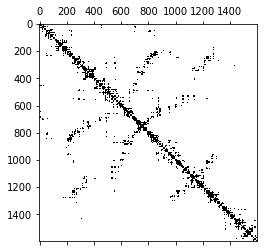

In [25]:
plt.spy(c,)

In [26]:
res = structure[0]['A'][5]
help(res)

Help on Residue in module Bio.PDB.Residue object:

class Residue(Bio.PDB.Entity.Entity)
 |  Residue(id, resname, segid)
 |  
 |  Represents a residue. A Residue object stores atoms.
 |  
 |  Method resolution order:
 |      Residue
 |      Bio.PDB.Entity.Entity
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, id, resname, segid)
 |      Initialize the class.
 |  
 |  __repr__(self)
 |      Return the residue full id.
 |  
 |  add(self, atom)
 |      Add an Atom object.
 |      
 |      Checks for adding duplicate atoms, and raises a
 |      PDBConstructionException if so.
 |  
 |  flag_disordered(self)
 |      Set the disordered flag.
 |  
 |  get_atom(self)
 |      Return atom.
 |  
 |  get_atoms(self)
 |      Return atoms.
 |  
 |  get_resname(self)
 |      Return the residue name.
 |  
 |  get_segid(self)
 |      Return the segment identifier.
 |  
 |  get_unpacked_list(self)
 |      Return the list of all atoms, unpack DisorderedAtoms.
 |  
 |  is_diso

In [27]:
type(res.get_unpacked_list()[0])

Bio.PDB.Atom.Atom

In [40]:
h = ele("H")
h.vdw_radius

110.00000000000001

In [39]:
help(h)

Help on Element in module mendeleev.tables object:

class Element(sqlalchemy.ext.declarative.api.Base)
 |  Element(**kwargs)
 |  
 |  Chemical element.
 |  
 |  Attributes:
 |    abundance_crust : float
 |      Abundance in the earth's crust in mg/kg
 |    abundance_sea : float
 |      Abundance in the seas in mg/L
 |    annotation : str
 |      Annotations regarding the data
 |    atomic_number : int
 |      Atomic number
 |    atomic_radius : float
 |      Atomic radius in pm
 |    atomic_radius_rahm : float
 |      Atomic radius by Rahm et al. in pm
 |    atomic_volume : float
 |      Atomic volume in cm3/mol
 |    atomic_weight : float
 |      Relative atomic weight as the ratio of the average mass of atoms
 |      of the element to 1/12 of the mass of an atom of 12C
 |    block : str
 |      Block in periodic table, s, p, d, f
 |    boiling_point : float
 |      Boiling temperature in K
 |    c6 : float
 |      C_6 dispersion coefficient in a.u. from X. Chu & A. Dalgarno, J. Chem.

# Label the dataset (forget for now, might be used later)

In [50]:
def isWithinDistance(p_atom, n_atom):
    return np.linalg.norm(p_atom.get_coord() - n_atom.get_coord) <= 4.5

In [51]:
"""
This function determines the van der waals interaction base on the van der waals distance of two atoms and a cutoff(usually smaller than 1A)
"""
def isVdwInteraction(p_atom, n_atom, epsilon):
    p_vdw = ele(p_atom.get_id()[0]).vdw_radius * 0.01
    n_vdw = ele(n_atom.get_id()[0]).vdw_raidus * 0.01
    
    distance = np.linalg.norm(p_atom.get_coord() - n_atom.get_coord)
    
    if distance <= p_vdw + n_vdw + epsilon:
        return True
    
    return False

In [52]:
"""
Determine if the atom participate in a hydrogen bonding
One of the input must be hydrogen
"""

def isHInteraction(p_atom, n_atom, epsilon):
    if p_atom.get_id()[0] != 'H' and n_atom.get_id()[0] != 'H':
        return False
    
    p_vdw = ele(p_atom.get_id()[0]).vdw_radius * 0.01
    n_vdw = ele(n_atom.get_id()[0]).vdw_raidus * 0.01
    
    distance = np.linalg.norm(p_atom.get_coord() - n_atom.get_coord)
    
    if distance <= p_vdw + n_vdw + epsilon:
        """Need angle check or not?"""
        return True
    return False

In [1]:
import scipy.io
mat = scipy.io.loadmat('../datasets/binding site prediction based on structural feature/benchmark/precomputed/1A4T.mat')

In [13]:
print(mat['File'][0][0][3]) #[0, 0, 3]

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]
